## **Visualizing 2022 Election Turnouts**

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import geopandas as gpd
from matplotlib.ticker import FuncFormatter

# Load the font to be used
plt.rcParams['font.family'] = 'Gotham'

In [2]:
# Load GeoDataFrame from a GeoJSON file
gdf_1 = gpd.read_file(r"C:\Users\Ebo\DS162\Data-Vis\GeoPandas_Folder\Data\level_1\gadm41_PHL_1.json")

In [3]:
display(gdf_1)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,"MULTIPOLYGON (((120.74770 17.15760, 120.70220 ..."
1,PHL.2_1,PHL,Philippines,AgusandelNorte,NA,NA,Lalawigan,Province,1602,PH.AN,PH-AGN,"MULTIPOLYGON (((125.51140 8.70020, 125.49690 8..."
2,PHL.3_1,PHL,Philippines,AgusandelSur,NA,NA,Lalawigan,Province,1603,PH.AS,PH-AGS,"MULTIPOLYGON (((126.05210 7.93630, 126.04570 7..."
3,PHL.4_1,PHL,Philippines,Aklan,NA,NA,Lalawigan,Province,604,PH.AK,PH-AKL,"MULTIPOLYGON (((122.41860 11.63550, 122.42170 ..."
4,PHL.5_1,PHL,Philippines,Albay,NA,NA,Lalawigan,Province,505,PH.AL,PH-ALB,"MULTIPOLYGON (((123.44640 13.02780, 123.43690 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
76,PHL.77_1,PHL,Philippines,Tawi-Tawi,NA,NA,Lalawigan,Province,1570,PH.TT,PH-TAW,"MULTIPOLYGON (((119.93200 4.89920, 119.93060 4..."
77,PHL.78_1,PHL,Philippines,Zambales,NA,NA,Lalawigan,Province,155,PH.PN,PH-ZMB,"MULTIPOLYGON (((120.29530 14.80140, 120.29660 ..."
78,PHL.79_1,PHL,Philippines,ZamboangadelNorte,NA,NA,Lalawigan,Province,972,PH.ZN,PH-ZAN,"MULTIPOLYGON (((121.90390 7.15030, 121.90810 7..."
79,PHL.80_1,PHL,Philippines,ZamboangadelSur,NA,NA,Lalawigan,Province,973,PH.ZS,PH-ZAS,"MULTIPOLYGON (((122.06710 6.86890, 122.06470 6..."


#### **Extracting Electoral Data from Provinces**

In [4]:
electorate = pd.read_csv(r"C:\Users\Ebo\DS162\Data-Vis\Datasets\kw uykejn - electorales.csv")

In [5]:
electorate

,Area,Cluster,Region,Dominant Language,Classification,Electoral Population,Voters who Voted,Turnout
0,Abra,Luzon,Cordillera,Ilocano,Province,182696,159540,0.8733
1,Agusan del Norte,Mindanao,Caraga,Cebuano,Province,502116,428541,0.8535
2,Agusan del Sur,Mindanao,Caraga,Cebuano,Province,442628,364989,0.8246
3,Aklan,Visayas,Western Visayas,Aklanon,Province,409938,353272,0.8618
4,Albay,Luzon,Bicol,Bicolano,Province,890148,775762,0.8715
...,...,...,...,...,...,...,...,...
76,Tawi-Tawi,Mindanao,Bangsamoro,Tausug,Province,232845,192146,0.8252
77,Zambales,Luzon,Central Luzon,Tagalog,Province,540309,458672,0.8489
78,Zamboanga del Norte,Mindanao,Zamboanga Peninsula,Cebuano,Province,738543,608377,0.8238
79,Zamboanga del Sur,Mindanao,Zamboanga Peninsula,Cebuano,Province,1583565,1274414,0.8048


In [6]:
gdf_1

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,"MULTIPOLYGON (((120.74770 17.15760, 120.70220 ..."
1,PHL.2_1,PHL,Philippines,AgusandelNorte,NA,NA,Lalawigan,Province,1602,PH.AN,PH-AGN,"MULTIPOLYGON (((125.51140 8.70020, 125.49690 8..."
2,PHL.3_1,PHL,Philippines,AgusandelSur,NA,NA,Lalawigan,Province,1603,PH.AS,PH-AGS,"MULTIPOLYGON (((126.05210 7.93630, 126.04570 7..."
3,PHL.4_1,PHL,Philippines,Aklan,NA,NA,Lalawigan,Province,604,PH.AK,PH-AKL,"MULTIPOLYGON (((122.41860 11.63550, 122.42170 ..."
4,PHL.5_1,PHL,Philippines,Albay,NA,NA,Lalawigan,Province,505,PH.AL,PH-ALB,"MULTIPOLYGON (((123.44640 13.02780, 123.43690 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
76,PHL.77_1,PHL,Philippines,Tawi-Tawi,NA,NA,Lalawigan,Province,1570,PH.TT,PH-TAW,"MULTIPOLYGON (((119.93200 4.89920, 119.93060 4..."
77,PHL.78_1,PHL,Philippines,Zambales,NA,NA,Lalawigan,Province,155,PH.PN,PH-ZMB,"MULTIPOLYGON (((120.29530 14.80140, 120.29660 ..."
78,PHL.79_1,PHL,Philippines,ZamboangadelNorte,NA,NA,Lalawigan,Province,972,PH.ZN,PH-ZAN,"MULTIPOLYGON (((121.90390 7.15030, 121.90810 7..."
79,PHL.80_1,PHL,Philippines,ZamboangadelSur,NA,NA,Lalawigan,Province,973,PH.ZS,PH-ZAS,"MULTIPOLYGON (((122.06710 6.86890, 122.06470 6..."


The data from the .json file is not updated, likely as latest as 2012.

The dataset from Commission on Elections shows new province of Davao Occidental *(separated from Davao del Sur in 2013)*, newly named Davao de Oro *(renamed from Compostela Valley in 2019)*, and Cotabato, which can be replaced into North Cotabato to conform with the .json file.

To fix this, alteration of the dataset is needed in spreadsheet.

#### **Merging the geographical and electoral data**

In [7]:
gdf1a = gdf_1.drop(columns=['VARNAME_1', 'NL_NAME_1', 'TYPE_1','CC_1', 'HASC_1', 'ISO_1']).copy()
electorate1a = electorate.drop(columns='Classification').copy()

In [8]:
electorate1a

,Area,Cluster,Region,Dominant Language,Electoral Population,Voters who Voted,Turnout
0,Abra,Luzon,Cordillera,Ilocano,182696,159540,0.8733
1,Agusan del Norte,Mindanao,Caraga,Cebuano,502116,428541,0.8535
2,Agusan del Sur,Mindanao,Caraga,Cebuano,442628,364989,0.8246
3,Aklan,Visayas,Western Visayas,Aklanon,409938,353272,0.8618
4,Albay,Luzon,Bicol,Bicolano,890148,775762,0.8715
...,...,...,...,...,...,...,...
76,Tawi-Tawi,Mindanao,Bangsamoro,Tausug,232845,192146,0.8252
77,Zambales,Luzon,Central Luzon,Tagalog,540309,458672,0.8489
78,Zamboanga del Norte,Mindanao,Zamboanga Peninsula,Cebuano,738543,608377,0.8238
79,Zamboanga del Sur,Mindanao,Zamboanga Peninsula,Cebuano,1583565,1274414,0.8048


In [9]:
gdf1a

,GID_1,GID_0,COUNTRY,NAME_1,ENGTYPE_1,geometry
0,PHL.1_1,PHL,Philippines,Abra,Province,"MULTIPOLYGON (((120.74770 17.15760, 120.70220 ..."
1,PHL.2_1,PHL,Philippines,AgusandelNorte,Province,"MULTIPOLYGON (((125.51140 8.70020, 125.49690 8..."
2,PHL.3_1,PHL,Philippines,AgusandelSur,Province,"MULTIPOLYGON (((126.05210 7.93630, 126.04570 7..."
3,PHL.4_1,PHL,Philippines,Aklan,Province,"MULTIPOLYGON (((122.41860 11.63550, 122.42170 ..."
4,PHL.5_1,PHL,Philippines,Albay,Province,"MULTIPOLYGON (((123.44640 13.02780, 123.43690 ..."
...,...,...,...,...,...,...
76,PHL.77_1,PHL,Philippines,Tawi-Tawi,Province,"MULTIPOLYGON (((119.93200 4.89920, 119.93060 4..."
77,PHL.78_1,PHL,Philippines,Zambales,Province,"MULTIPOLYGON (((120.29530 14.80140, 120.29660 ..."
78,PHL.79_1,PHL,Philippines,ZamboangadelNorte,Province,"MULTIPOLYGON (((121.90390 7.15030, 121.90810 7..."
79,PHL.80_1,PHL,Philippines,ZamboangadelSur,Province,"MULTIPOLYGON (((122.06710 6.86890, 122.06470 6..."


In [10]:
# Merge the dataframes without specifying a common column
merged_df = pd.concat([gdf1a, electorate1a], axis=1).copy()

# Arrange the columns manually
merged_df = merged_df[['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'Area', 'Cluster', 'Region', 'Dominant Language',
                       'ENGTYPE_1', 'Electoral Population', 'Voters who Voted', 'Turnout', 'geometry']]

# Display the merged and arranged dataframe
(merged_df)

,GID_1,GID_0,COUNTRY,NAME_1,Area,Cluster,Region,Dominant Language,ENGTYPE_1,Electoral Population,Voters who Voted,Turnout,geometry
0,PHL.1_1,PHL,Philippines,Abra,Abra,Luzon,Cordillera,Ilocano,Province,182696,159540,0.8733,"MULTIPOLYGON (((120.74770 17.15760, 120.70220 ..."
1,PHL.2_1,PHL,Philippines,AgusandelNorte,Agusan del Norte,Mindanao,Caraga,Cebuano,Province,502116,428541,0.8535,"MULTIPOLYGON (((125.51140 8.70020, 125.49690 8..."
2,PHL.3_1,PHL,Philippines,AgusandelSur,Agusan del Sur,Mindanao,Caraga,Cebuano,Province,442628,364989,0.8246,"MULTIPOLYGON (((126.05210 7.93630, 126.04570 7..."
3,PHL.4_1,PHL,Philippines,Aklan,Aklan,Visayas,Western Visayas,Aklanon,Province,409938,353272,0.8618,"MULTIPOLYGON (((122.41860 11.63550, 122.42170 ..."
4,PHL.5_1,PHL,Philippines,Albay,Albay,Luzon,Bicol,Bicolano,Province,890148,775762,0.8715,"MULTIPOLYGON (((123.44640 13.02780, 123.43690 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,PHL.77_1,PHL,Philippines,Tawi-Tawi,Tawi-Tawi,Mindanao,Bangsamoro,Tausug,Province,232845,192146,0.8252,"MULTIPOLYGON (((119.93200 4.89920, 119.93060 4..."
77,PHL.78_1,PHL,Philippines,Zambales,Zambales,Luzon,Central Luzon,Tagalog,Province,540309,458672,0.8489,"MULTIPOLYGON (((120.29530 14.80140, 120.29660 ..."
78,PHL.79_1,PHL,Philippines,ZamboangadelNorte,Zamboanga del Norte,Mindanao,Zamboanga Peninsula,Cebuano,Province,738543,608377,0.8238,"MULTIPOLYGON (((121.90390 7.15030, 121.90810 7..."
79,PHL.80_1,PHL,Philippines,ZamboangadelSur,Zamboanga del Sur,Mindanao,Zamboanga Peninsula,Cebuano,Province,1583565,1274414,0.8048,"MULTIPOLYGON (((122.06710 6.86890, 122.06470 6..."


Let's say we are going to visualize the voter turnouts of provinces in Luzon, including Metro Manila.

In [11]:
merged_df['Turnout'].describe()

count    81.000000
mean      0.845107
std       0.032597
min       0.713700
25%       0.832200
50%       0.853500
75%       0.870400
max       0.890400
Name: Turnout, dtype: float64

In [12]:
merged_df['Electoral Population'].describe().round(2)

count         81.00
mean      863034.70
std      1031098.25
min        13820.00
25%       313427.00
50%       538082.00
75%       949791.00
max      7322361.00
Name: Electoral Population, dtype: float64

In [13]:
merged_df['Voters who Voted'].describe().round(2)

count         81.00
mean      723982.28
std       852261.23
min        11801.00
25%       263453.00
50%       458672.00
75%       837470.00
max      5962693.00
Name: Voters who Voted, dtype: float64

#### **Visualizations per Island Cluster**

##### Luzon

In [14]:
df_luzonconmm = merged_df[merged_df['Cluster'] == 'Luzon'].copy()
display(df_luzonconmm)

,GID_1,GID_0,COUNTRY,NAME_1,Area,Cluster,Region,Dominant Language,ENGTYPE_1,Electoral Population,Voters who Voted,Turnout,geometry
0,PHL.1_1,PHL,Philippines,Abra,Abra,Luzon,Cordillera,Ilocano,Province,182696,159540,0.8733,"MULTIPOLYGON (((120.74770 17.15760, 120.70220 ..."
4,PHL.5_1,PHL,Philippines,Albay,Albay,Luzon,Bicol,Bicolano,Province,890148,775762,0.8715,"MULTIPOLYGON (((123.44640 13.02780, 123.43690 ..."
6,PHL.7_1,PHL,Philippines,Apayao,Apayao,Luzon,Cordillera,Ilocano,Province,78454,67563,0.8612,"MULTIPOLYGON (((121.11680 17.74140, 121.11020 ..."
7,PHL.8_1,PHL,Philippines,Aurora,Aurora,Luzon,Central Luzon,Tagalog,Province,154688,130167,0.8415,"MULTIPOLYGON (((121.40290 15.24630, 121.41950 ..."
9,PHL.10_1,PHL,Philippines,Bataan,Bataan,Luzon,Central Luzon,Tagalog,Province,566479,498293,0.8796,"MULTIPOLYGON (((120.62190 14.36570, 120.61500 ..."
10,PHL.11_1,PHL,Philippines,Batanes,Batanes,Luzon,Cagayan Valley,Ivatan,Province,13820,11801,0.8539,"MULTIPOLYGON (((121.93080 20.40750, 121.94420 ..."
11,PHL.12_1,PHL,Philippines,Batangas,Batangas,Luzon,Calabarzon,Tagalog,Province,1819071,1587376,0.8726,"MULTIPOLYGON (((121.09670 13.54190, 121.09670 ..."
12,PHL.13_1,PHL,Philippines,Benguet,Benguet,Luzon,Cordillera,Ilocano,Province,580192,488150,0.8414,"MULTIPOLYGON (((120.65530 16.18770, 120.62600 ..."
16,PHL.17_1,PHL,Philippines,Bulacan,Bulacan,Luzon,Central Luzon,Tagalog,Province,2007523,1758220,0.8758,"MULTIPOLYGON (((120.95620 14.69800, 120.95890 ..."
17,PHL.18_1,PHL,Philippines,Cagayan,Cagayan,Luzon,Cagayan Valley,Ilocano,Province,766018,653635,0.8533,"MULTIPOLYGON (((122.26330 18.16910, 122.25750 ..."


In [15]:
print(df_luzonconmm['NAME_1'].nunique())
len(df_luzonconmm['Area'].unique().tolist())

39


39

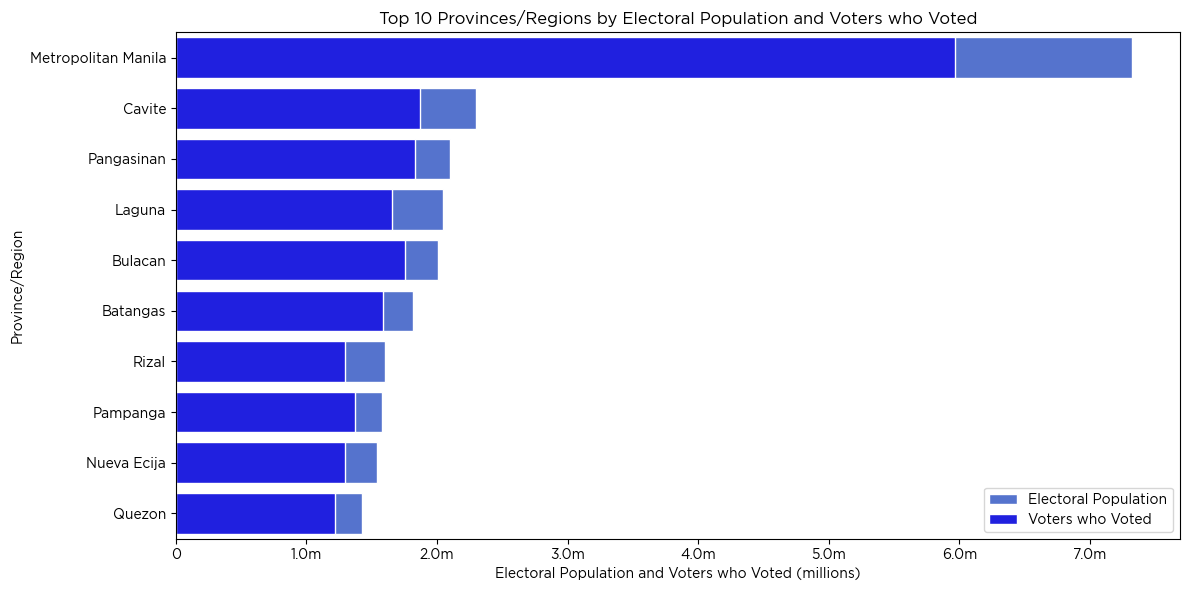

In [16]:
# Load your data (replace with your actual data)
top_10luzon = df_luzonconmm.sort_values(by='Electoral Population', ascending=False).head(10)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Electoral Population', y='Area', data=top_10luzon, color='royalblue', edgecolor='white', label='Electoral Population')
sns.barplot(x='Voters who Voted', y='Area', data=top_10luzon, color='blue', edgecolor='white', label='Voters who Voted')

# Set axis labels and title
ax.set_xlabel('Electoral Population and Voters who Voted (millions)')
ax.set_ylabel('Province/Region')
ax.set_title('Top 10 Provinces/Regions by Electoral Population and Voters who Voted')

# Add legend
ax.legend()

# Format x-tick labels
def format_ticks(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.1f}m"
    elif x >= 1e5:
        return f"{x/1e3:.1f}k"
    else:
        return "0"

ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.tight_layout()
plt.savefig('top10luzon.png', dpi=300)
plt.show()

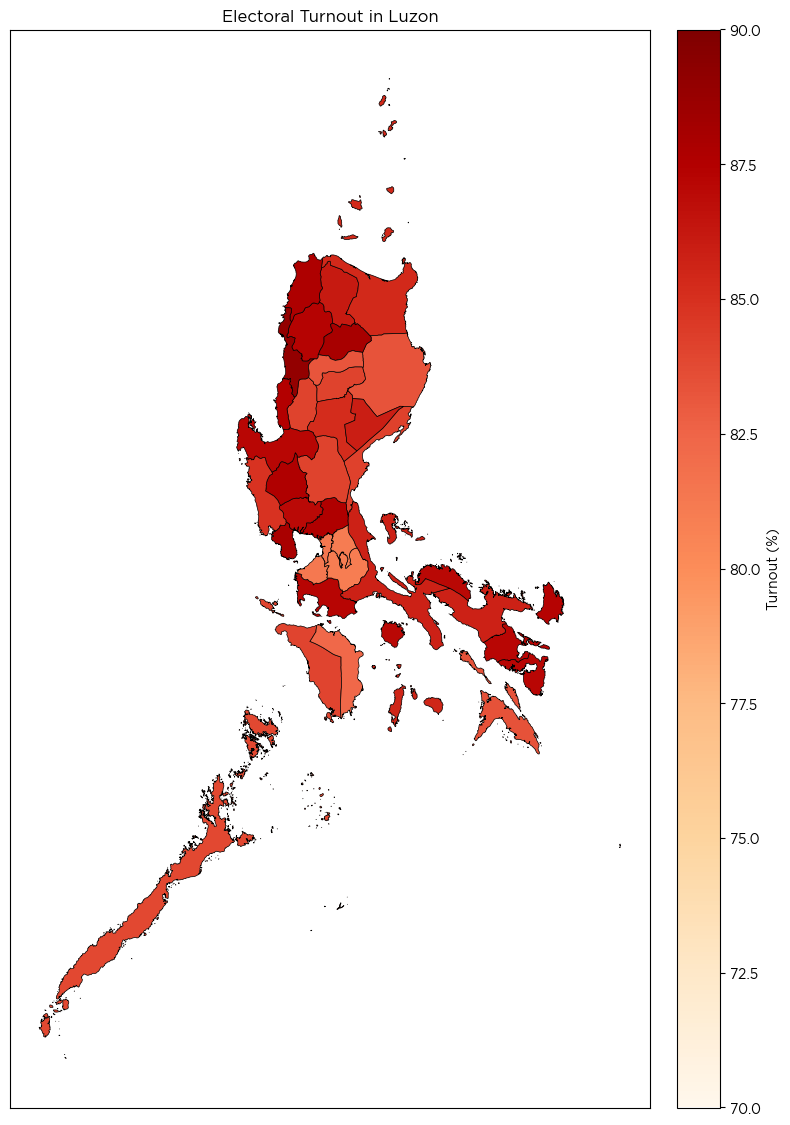

In [86]:
# Load GeoDataFrame (replace with your actual data)
gdf = df_luzonconmm

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(14,14))

# Define the minimum and maximum values for the colorbar
vmin = 0.7
vmax = 0.9

# Plot the GeoDataFrame
gdf.plot(column='Turnout', cmap='OrRd', edgecolor='black', linewidth=0.5, ax=ax, vmin=vmin, vmax=vmax)

# Add labels, titles, etc. as needed
ax.set_title("Electoral Turnout in Luzon")
ax.set_xticks([])
ax.set_yticks([])

cbar = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=70, vmax=90))
cbar = fig.colorbar(cbar, ax=ax, pad=0.025, aspect=25)
cbar.set_label('Turnout (%)')

# Save the plot with minimal white space
output_path = r'C:\Users\Ebo\DS162\placebo_first\Project_pers_test\Outputs\luzonmapturnout.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.125, dpi=600)

# Show the plot
plt.show()

##### Visayas 

In [18]:
df_visayas = merged_df[merged_df['Cluster'] == 'Visayas'].copy()
display(df_visayas)

,GID_1,GID_0,COUNTRY,NAME_1,Area,Cluster,Region,Dominant Language,ENGTYPE_1,Electoral Population,Voters who Voted,Turnout,geometry
3,PHL.4_1,PHL,Philippines,Aklan,Aklan,Visayas,Western Visayas,Aklanon,Province,409938,353272,0.8618,"MULTIPOLYGON (((122.41860 11.63550, 122.42170 ..."
5,PHL.6_1,PHL,Philippines,Antique,Antique,Visayas,Western Visayas,Kinaray-a,Province,387998,338242,0.8718,"MULTIPOLYGON (((121.95650 10.41520, 121.94530 ..."
13,PHL.14_1,PHL,Philippines,Biliran,Biliran,Visayas,Eastern Visayas,Waray,Province,123232,103359,0.8387,"MULTIPOLYGON (((124.57370 11.47220, 124.56150 ..."
14,PHL.15_1,PHL,Philippines,Bohol,Bohol,Visayas,Central Visayas,Cebuano,Province,949791,837470,0.8817,"MULTIPOLYGON (((123.91830 9.48970, 123.91920 9..."
21,PHL.22_1,PHL,Philippines,Capiz,Capiz,Visayas,Western Visayas,Hiligaynon,Province,529079,456474,0.8628,"MULTIPOLYGON (((122.55170 11.21480, 122.55080 ..."
24,PHL.25_1,PHL,Philippines,Cebu,Cebu,Visayas,Central Visayas,Cebuano,Province,4267217,3684386,0.8634,"MULTIPOLYGON (((123.33600 9.41440, 123.32860 9..."
30,PHL.31_1,PHL,Philippines,EasternSamar,Eastern Samar,Visayas,Eastern Visayas,Waray,Province,347616,293098,0.8432,"MULTIPOLYGON (((125.73780 10.70220, 125.72440 ..."
31,PHL.32_1,PHL,Philippines,Guimaras,Guimaras,Visayas,Western Visayas,Hiligaynon,Province,124076,107885,0.8695,"MULTIPOLYGON (((122.55360 10.40470, 122.55050 ..."
35,PHL.36_1,PHL,Philippines,Iloilo,Iloilo,Visayas,Western Visayas,Hiligaynon,Province,1959222,1641451,0.8378,"MULTIPOLYGON (((122.01630 10.51760, 122.01680 ..."
42,PHL.43_1,PHL,Philippines,Leyte,Leyte,Visayas,Eastern Visayas,Waray,Province,1350867,1177006,0.8713,"MULTIPOLYGON (((124.76760 10.22040, 124.76690 ..."


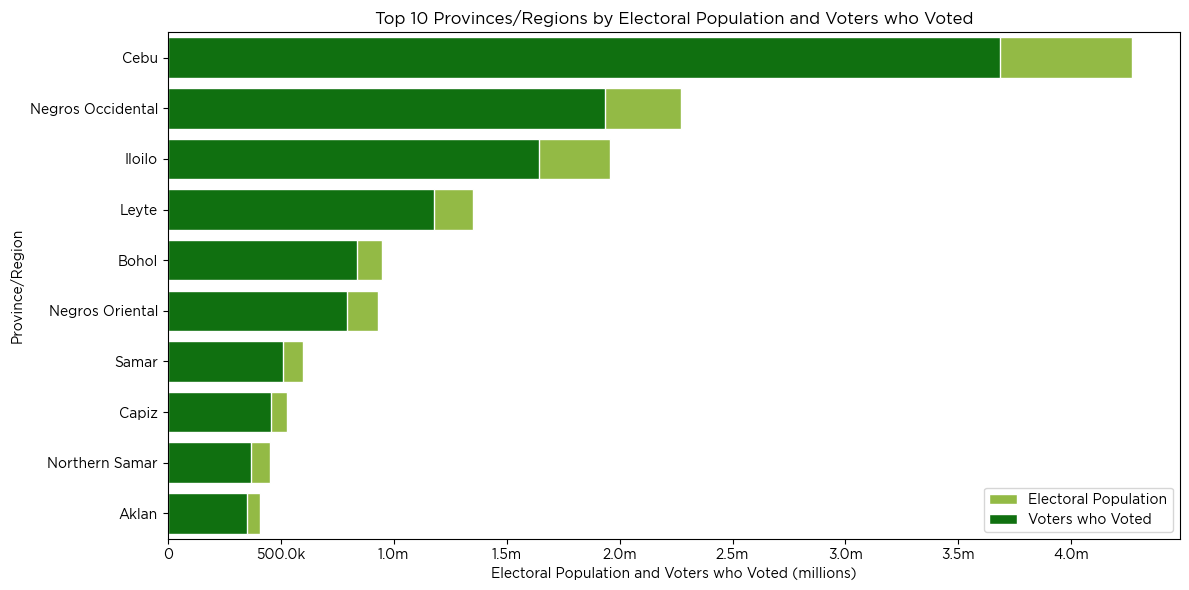

In [19]:
# Load your data (replace with your actual data)
top_10visayas = df_visayas.sort_values(by='Electoral Population', ascending=False).head(10)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Electoral Population', y='Area', data=top_10visayas, color='yellowgreen', edgecolor='white', label='Electoral Population')
sns.barplot(x='Voters who Voted', y='Area', data=top_10visayas, color='green', edgecolor='white', label='Voters who Voted')

# Set axis labels and title
ax.set_xlabel('Electoral Population and Voters who Voted (millions)')
ax.set_ylabel('Province/Region')
ax.set_title('Top 10 Provinces/Regions by Electoral Population and Voters who Voted')

# Add legend
ax.legend()

# Format x-tick labels
def format_ticks(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.1f}m"
    elif x >= 1e5:
        return f"{x/1e3:.1f}k"
    else:
        return "0"

ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.tight_layout()
plt.savefig('top10visayas.png', dpi=300)
plt.show()

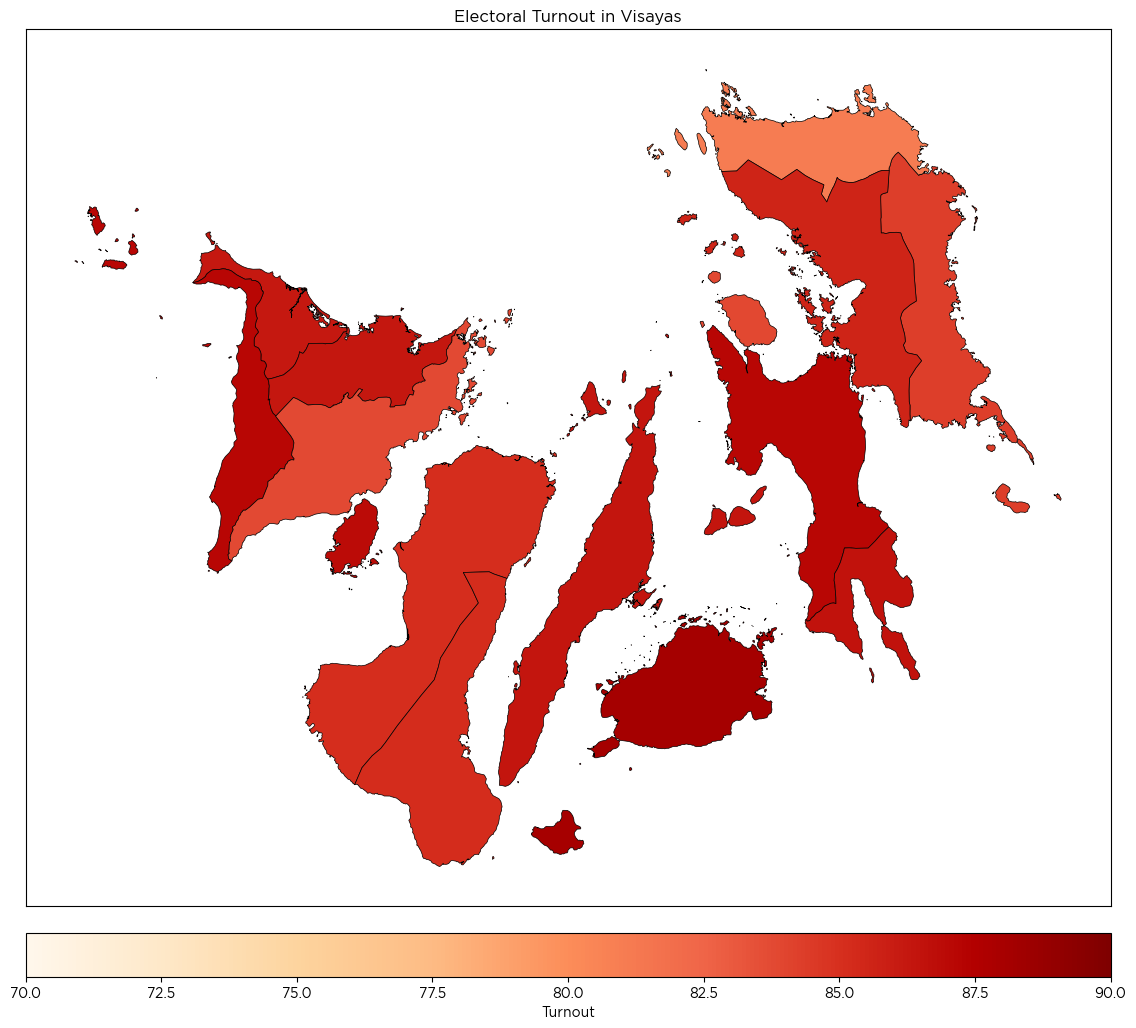

In [84]:
# Load GeoDataFrame (replace with your actual data)
gdf = df_visayas

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(14,14))

# Define the minimum and maximum values for the colorbar
vmin = 0.7
vmax = 0.9

# Plot the GeoDataFrame
gdf.plot(column='Turnout', cmap='OrRd', edgecolor='black', linewidth=0.5, ax=ax, vmin=vmin, vmax=vmax)

# Set font family to Gotham
plt.rcParams['font.family'] = 'Gotham'

# Add labels, titles, etc. as needed
ax.set_title("Electoral Turnout in Visayas")
ax.set_xticks([])
ax.set_yticks([])

cbar = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin*100, vmax=vmax*100))
cbar = fig.colorbar(cbar, ax=ax, orientation='horizontal', pad=0.025, aspect=25)
cbar.set_label('Turnout')

# Save the plot with minimal white space
output_path = r'C:\Users\Ebo\DS162\placebo_first\Project_pers_test\Outputs\visayasmapturnout.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.125, dpi=600)

# Show the plot
plt.show()

#### Mindanao

In [21]:
df_mindanao = merged_df[merged_df['Cluster'] == 'Mindanao'].copy()
display(df_mindanao)

,GID_1,GID_0,COUNTRY,NAME_1,Area,Cluster,Region,Dominant Language,ENGTYPE_1,Electoral Population,Voters who Voted,Turnout,geometry
1,PHL.2_1,PHL,Philippines,AgusandelNorte,Agusan del Norte,Mindanao,Caraga,Cebuano,Province,502116,428541,0.8535,"MULTIPOLYGON (((125.51140 8.70020, 125.49690 8..."
2,PHL.3_1,PHL,Philippines,AgusandelSur,Agusan del Sur,Mindanao,Caraga,Cebuano,Province,442628,364989,0.8246,"MULTIPOLYGON (((126.05210 7.93630, 126.04570 7..."
8,PHL.9_1,PHL,Philippines,Basilan,Basilan,Mindanao,Bangsamoro,Tausug,Province,297322,223811,0.7528,"MULTIPOLYGON (((121.98670 6.30860, 121.98860 6..."
15,PHL.16_1,PHL,Philippines,Bukidnon,Bukidnon,Mindanao,Northern Mindanao,Cebuano,Province,944838,817990,0.8657,"MULTIPOLYGON (((125.07240 7.45160, 125.06780 7..."
20,PHL.21_1,PHL,Philippines,Camiguin,Camiguin,Mindanao,Northern Mindanao,Cebuano,Province,64090,55153,0.8606,"MULTIPOLYGON (((124.75750 9.08440, 124.75200 9..."
25,PHL.26_1,PHL,Philippines,CompostelaValley,Compostela Valley,Mindanao,Davao,Cebuano,Province,508221,446526,0.8786,"MULTIPOLYGON (((125.99660 7.11320, 125.96480 7..."
26,PHL.27_1,PHL,Philippines,DavaodelNorte,Davao del Norte,Mindanao,Davao,Cebuano,Province,690248,577781,0.8371,"MULTIPOLYGON (((125.72400 6.91990, 125.72100 6..."
27,PHL.28_1,PHL,Philippines,DavaodelSur,Davao del Sur,Mindanao,Davao,Cebuano,Province,2634569,2001041,0.7658,"MULTIPOLYGON (((125.48920 5.42810, 125.49220 5..."
28,PHL.29_1,PHL,Philippines,DavaoOriental,Davao Oriental,Mindanao,Davao,Cebuano,Province,395751,341020,0.8617,"MULTIPOLYGON (((126.19120 6.27070, 126.19070 6..."
29,PHL.30_1,PHL,Philippines,DinagatIslands,Dinagat Islands,Mindanao,Caraga,Cebuano,Province,81088,66558,0.8208,"MULTIPOLYGON (((125.70220 9.88000, 125.70190 9..."


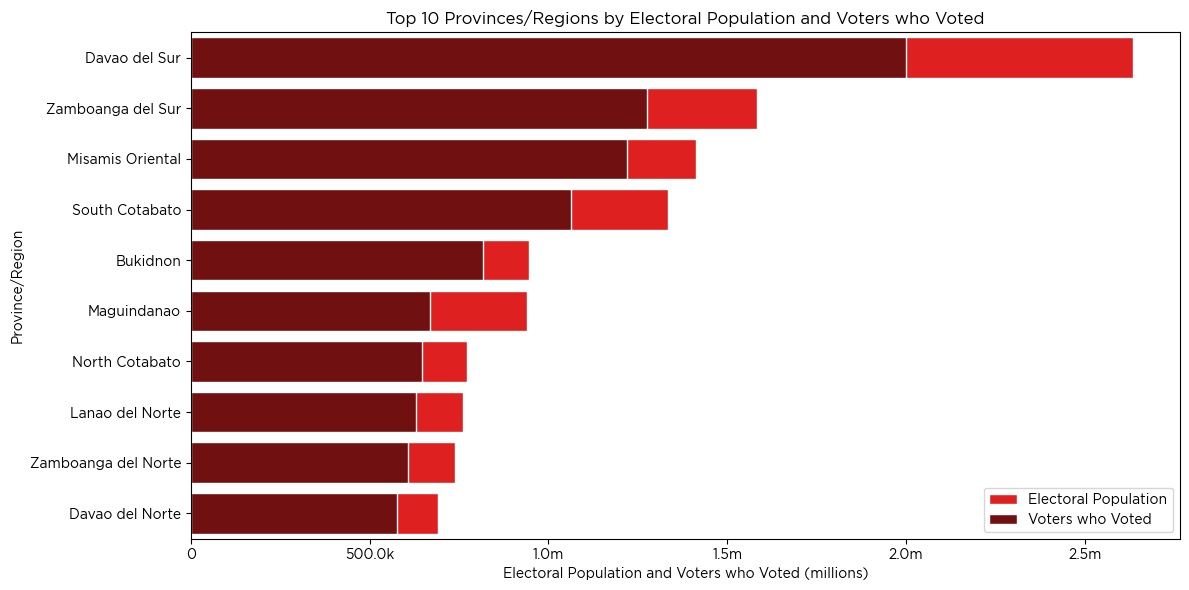

In [22]:
# Load your data (replace with your actual data)
top_10mindanao = df_mindanao.sort_values(by='Electoral Population', ascending=False).head(10)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Electoral Population', y='Area', data=top_10mindanao, color='red', edgecolor='white', label='Electoral Population')
sns.barplot(x='Voters who Voted', y='Area', data=top_10mindanao, color='maroon', edgecolor='white', label='Voters who Voted')

# Set axis labels and title
ax.set_xlabel('Electoral Population and Voters who Voted (millions)')
ax.set_ylabel('Province/Region')
ax.set_title('Top 10 Provinces/Regions by Electoral Population and Voters who Voted')

# Add legend
ax.legend()

# Format x-tick labels
def format_ticks(x, pos):
    if x >= 1e6:
        return f"{x/1e6:.1f}m"
    elif x >= 1e5:
        return f"{x/1e3:.1f}k"
    else:
        return "0"

ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.tight_layout()

plt.show()

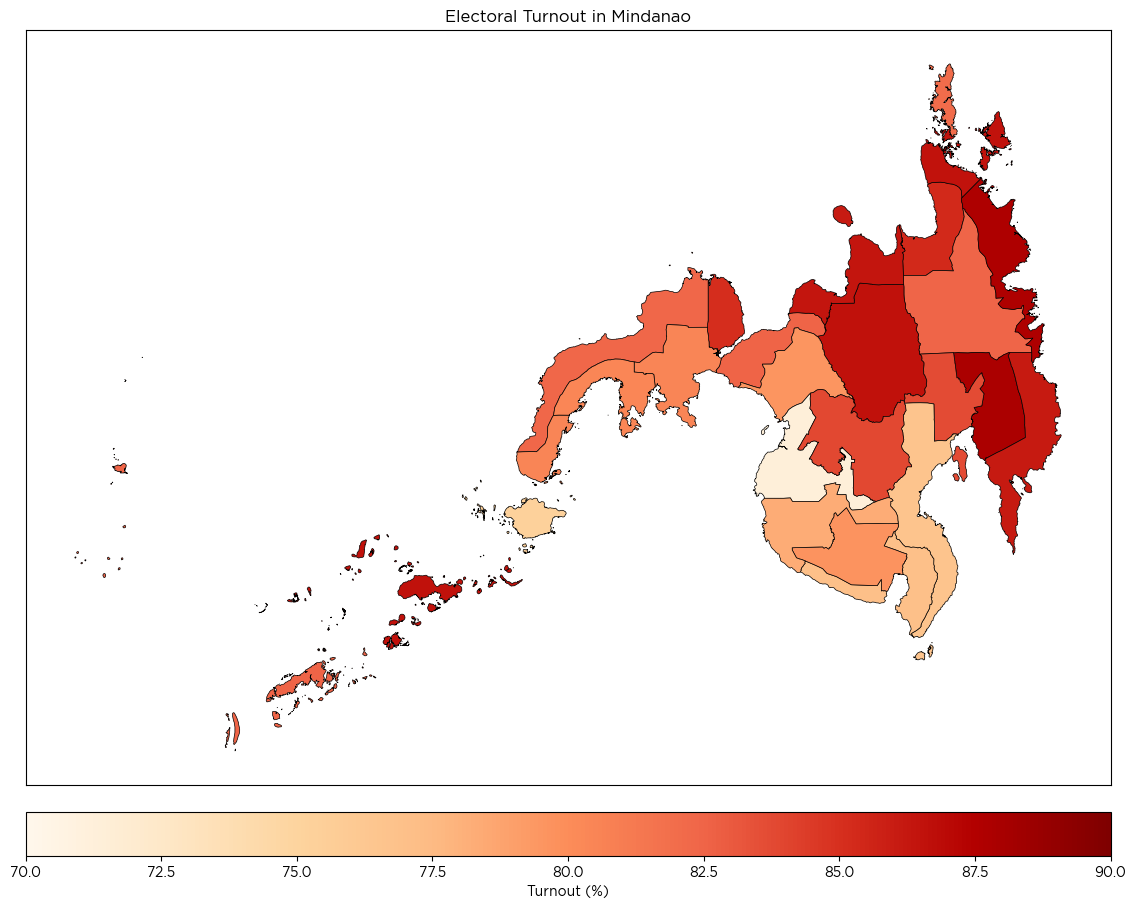

In [85]:
# Load GeoDataFrame (replace with your actual data)
gdf = df_mindanao

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(14, 14))

# Define the minimum and maximum values for the colorbar
vmin = 0.7
vmax = 0.9

# Plot the GeoDataFrame
gdf.plot(column='Turnout', cmap='OrRd', edgecolor='black', linewidth=0.5, ax=ax, vmin=vmin, vmax=vmax)

# Set font family to Gotham
plt.rcParams['font.family'] = 'Gotham'

# Add labels, titles, etc. as needed
ax.set_title("Electoral Turnout in Mindanao")
ax.set_xticks([])
ax.set_yticks([])

# Colorbar
cbar = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=70, vmax=90))
cbar = fig.colorbar(cbar, ax=ax, orientation='horizontal', pad=0.025, aspect=25)
cbar.set_label('Turnout (%)')

# Save the plot with minimal white space
output_path = r'C:\Users\Ebo\DS162\placebo_first\Project_pers_test\Outputs\mindanaomapturnout.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.125, dpi=600)

# Show the plot
plt.show()

#### Whole Philippines

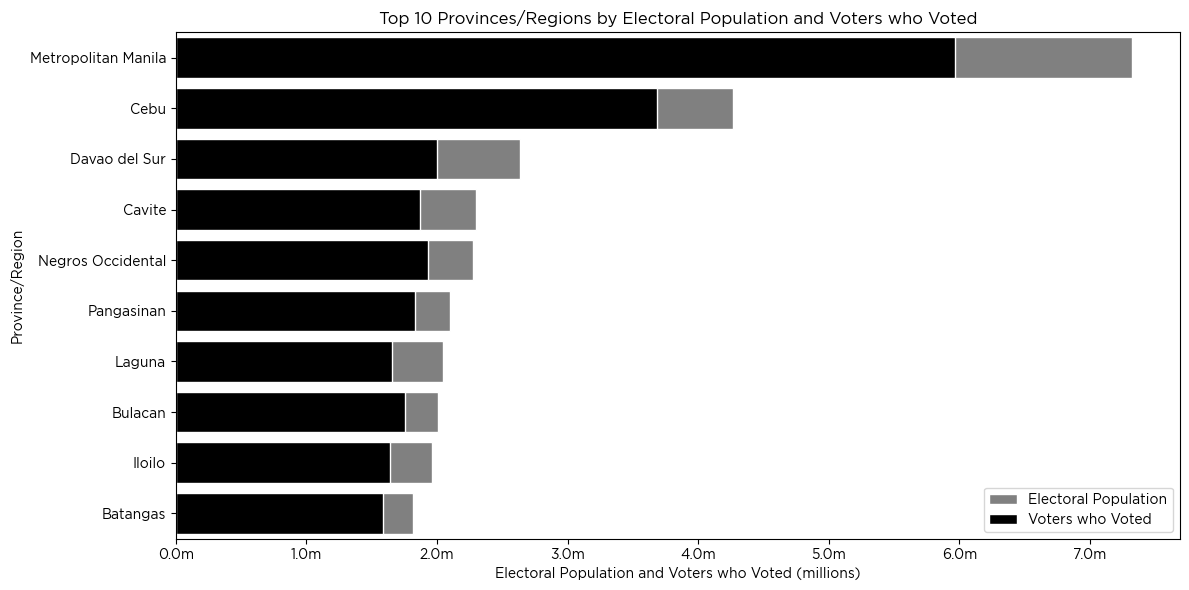

In [24]:
# Load your data (replace with your actual data)
top_10ph = merged_df.sort_values(by='Electoral Population', ascending=False).head(10)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Electoral Population', y='Area', data=top_10ph, color='gray', edgecolor='white', label='Electoral Population')
sns.barplot(x='Voters who Voted', y='Area', data=top_10ph, color='black', edgecolor='white', label='Voters who Voted')

# Set axis labels and title
ax.set_xlabel('Electoral Population and Voters who Voted (millions)')
ax.set_ylabel('Province/Region')
ax.set_title('Top 10 Provinces/Regions by Electoral Population and Voters who Voted')

# Add legend
ax.legend()

# Format x-tick labels as "1.0m," "2.0m," etc.
def format_ticks(x, pos):
    return f"{x/1e6:.1f}m"

ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.tight_layout()
plt.savefig('top_10_provinces.png', dpi=300)
plt.show()

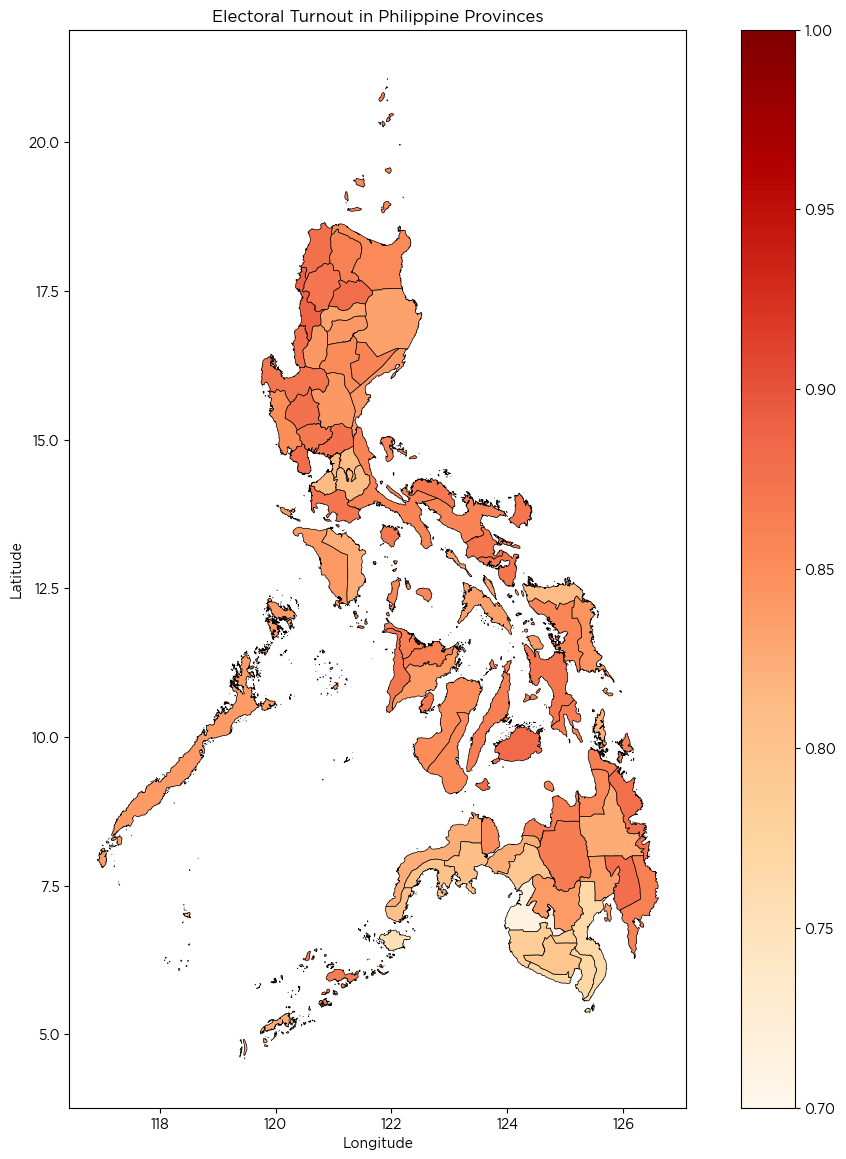

In [25]:
# Load GeoDataFrame (replace with your actual data)
gdf = merged_df

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(14, 14))

# Define the minimum and maximum values for the colorbar
vmin = 0.7
vmax = 1

# Plot the GeoDataFrame
gdf.plot(column='Turnout', cmap='OrRd', edgecolor='black', linewidth=0.5, legend=True, ax=ax, vmin=vmin, vmax=vmax)

# Set font family to Gotham
plt.rcParams['font.family'] = 'Gotham'

# Add labels, titles, etc. as needed
ax.set_title("Electoral Turnout in Philippine Provinces")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Save the plot with minimal white space
output_path = r'C:\Users\Ebo\DS162\placebo_first\Project_pers_test\Outputs\philippinesturnout.png'
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.125, dpi=300)

# Show the plot
plt.show()
